In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
trust_path = 'Data/Trust'

⚠️ Skipping .DS_Store, bad encoding


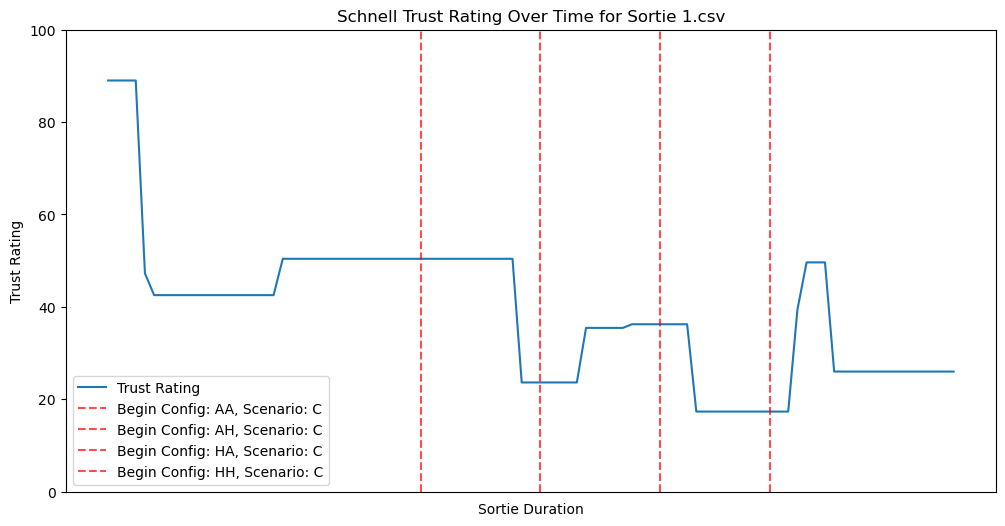

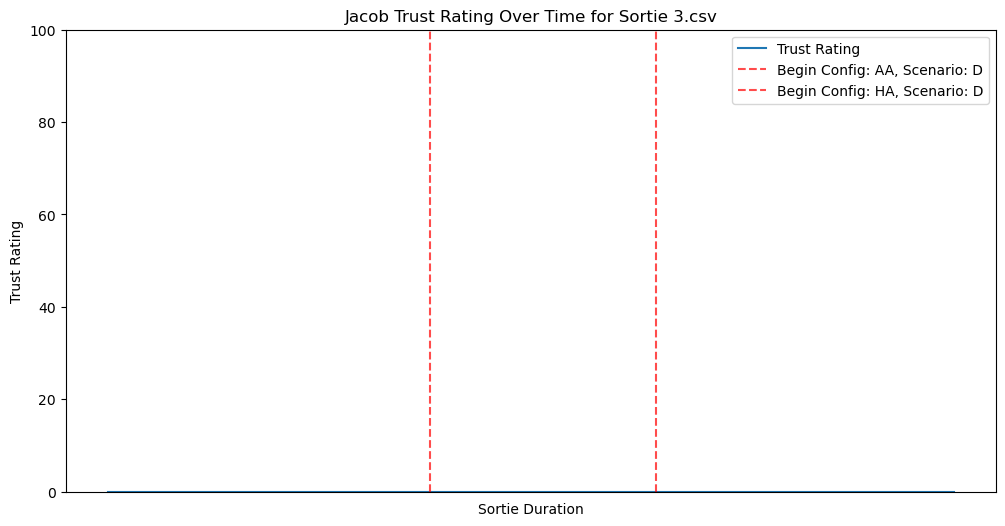

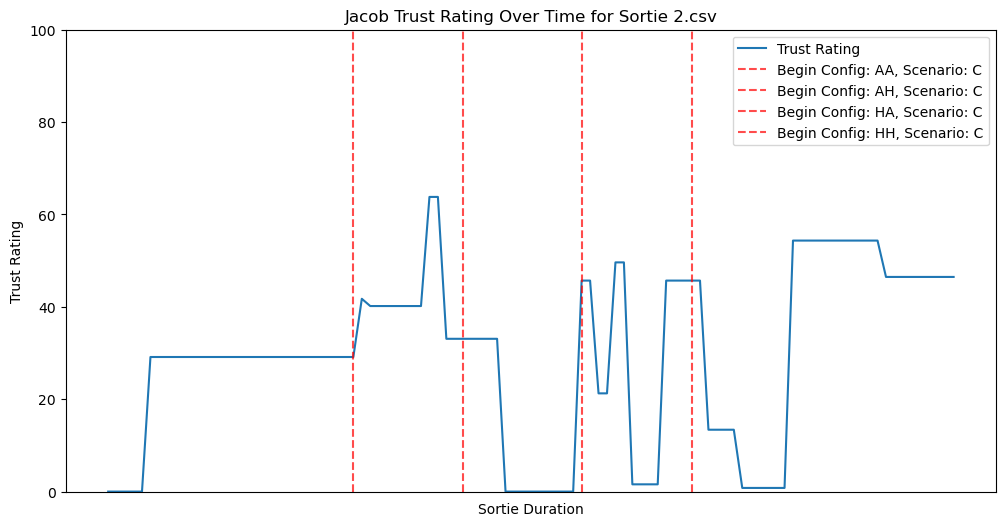

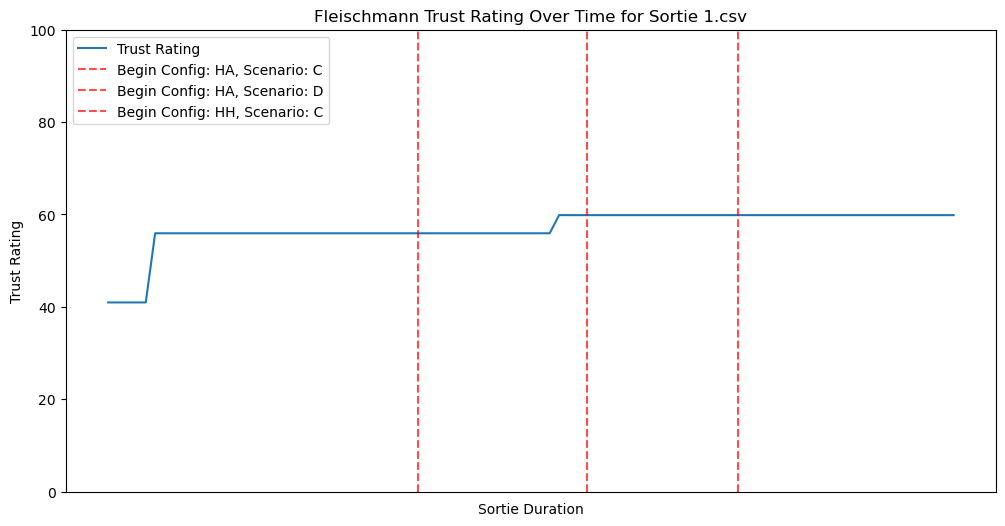

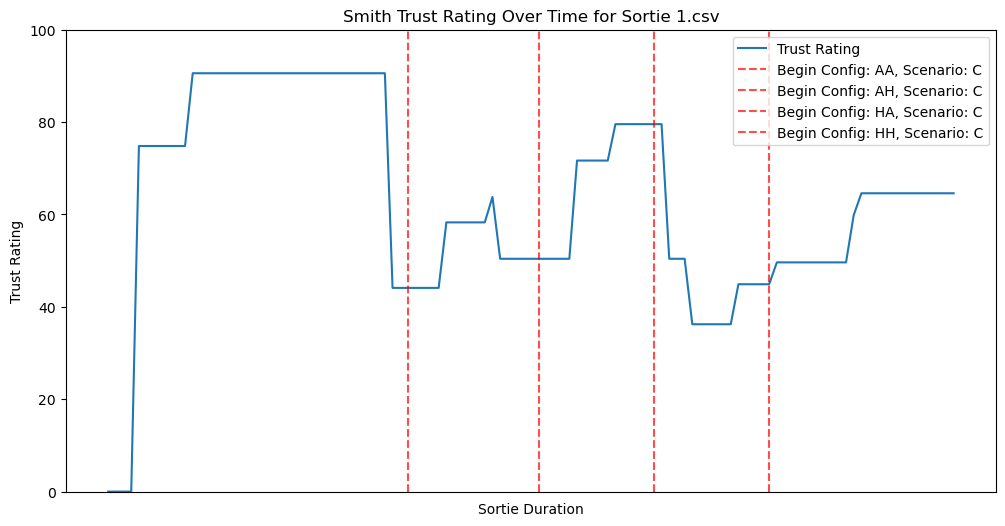

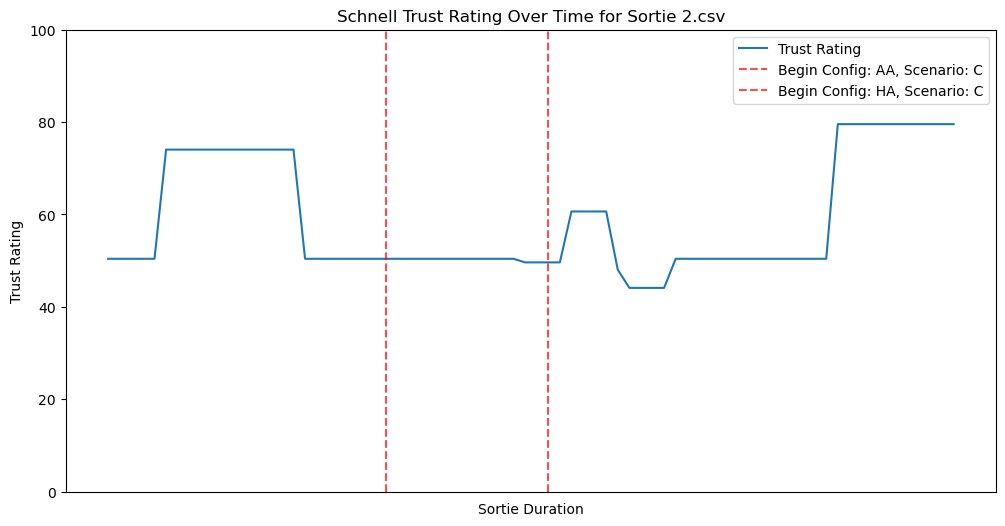

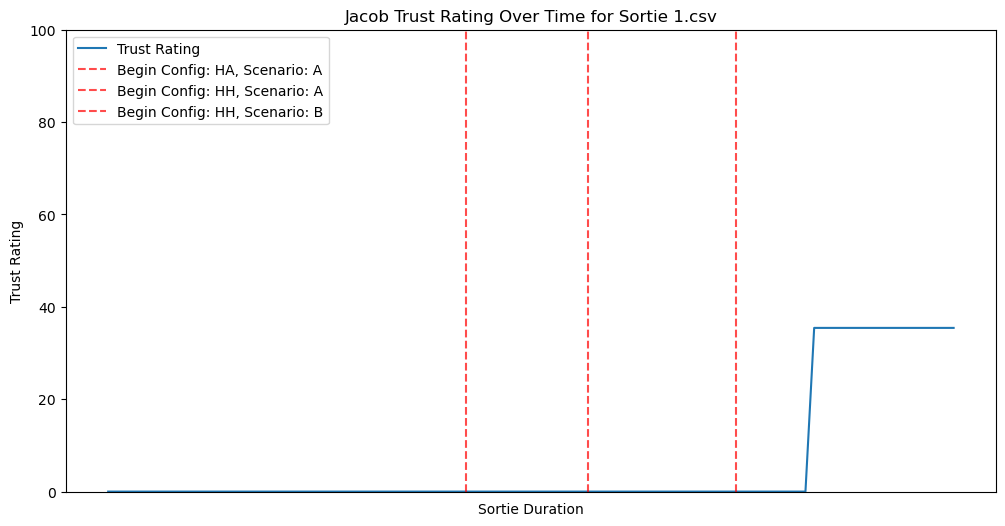

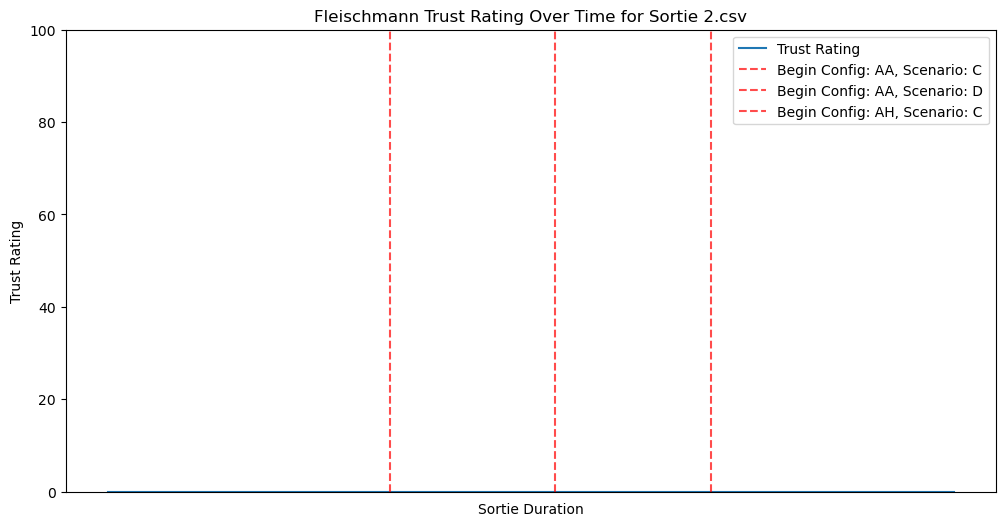

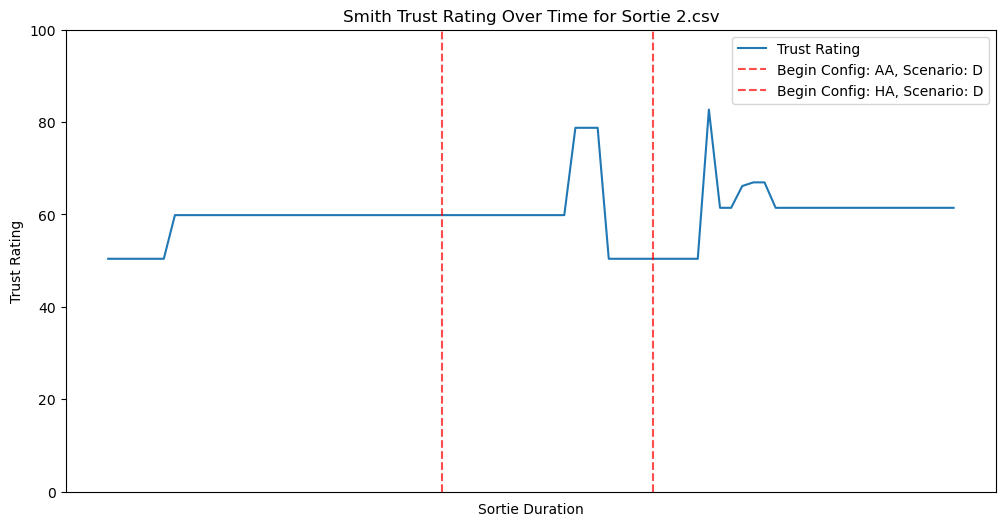

<Figure size 1200x600 with 0 Axes>

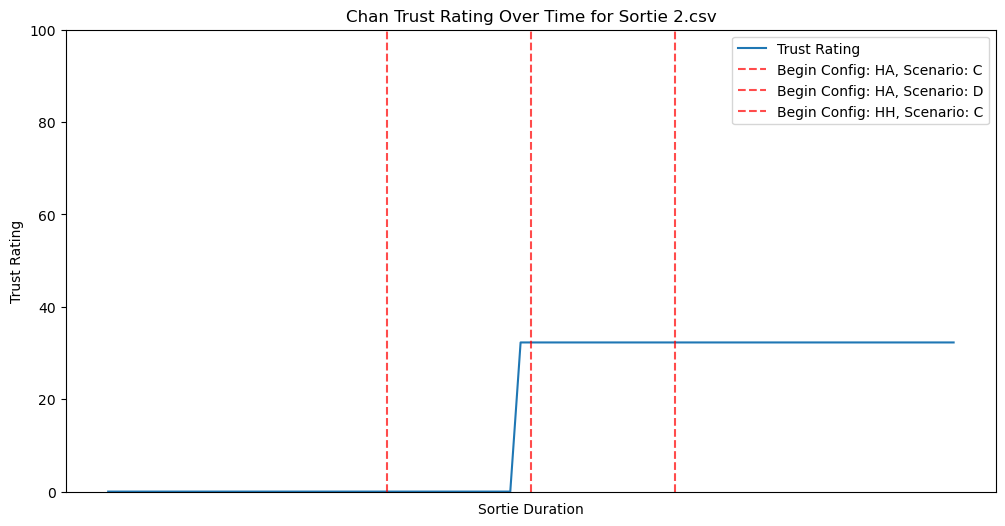

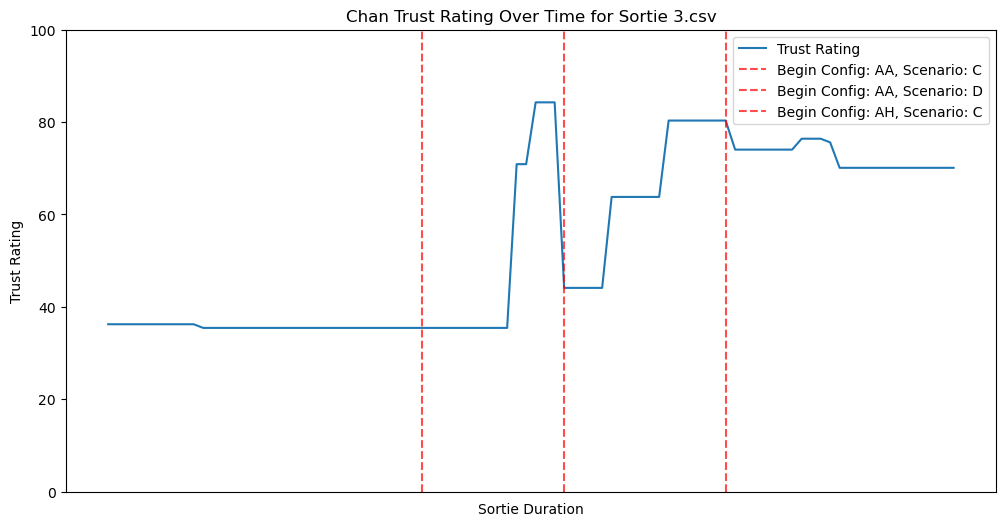

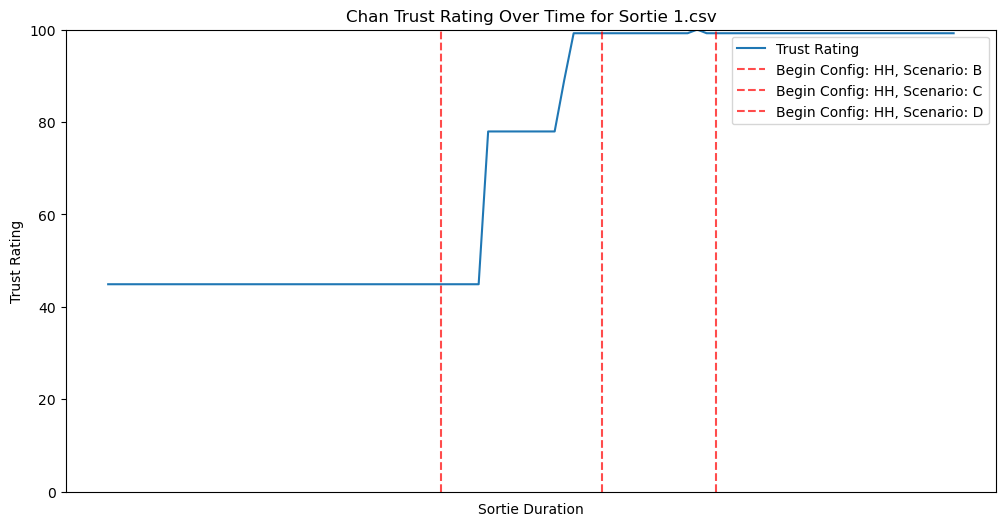

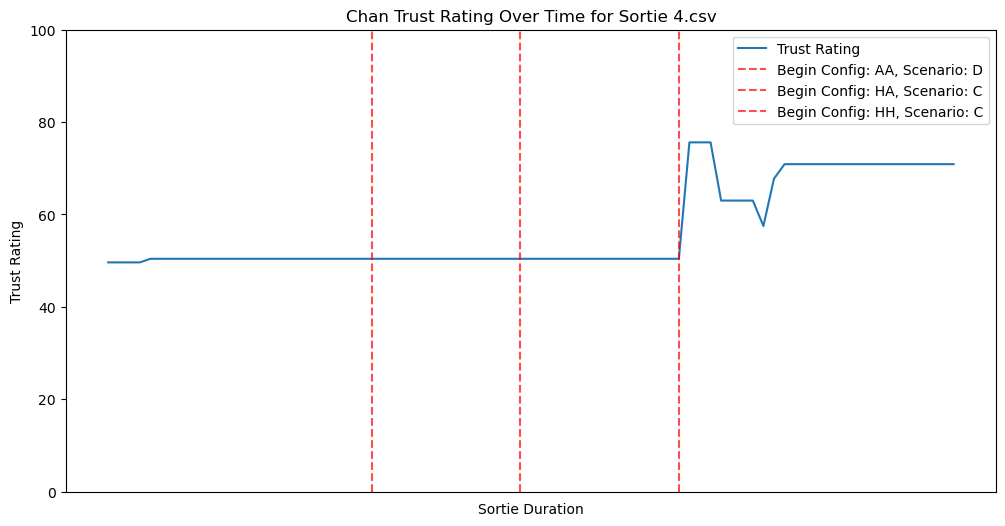

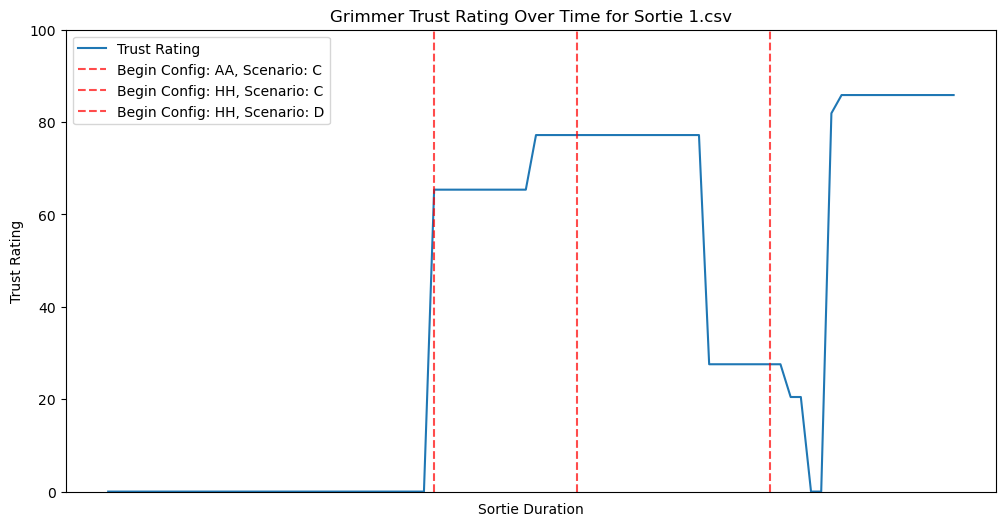

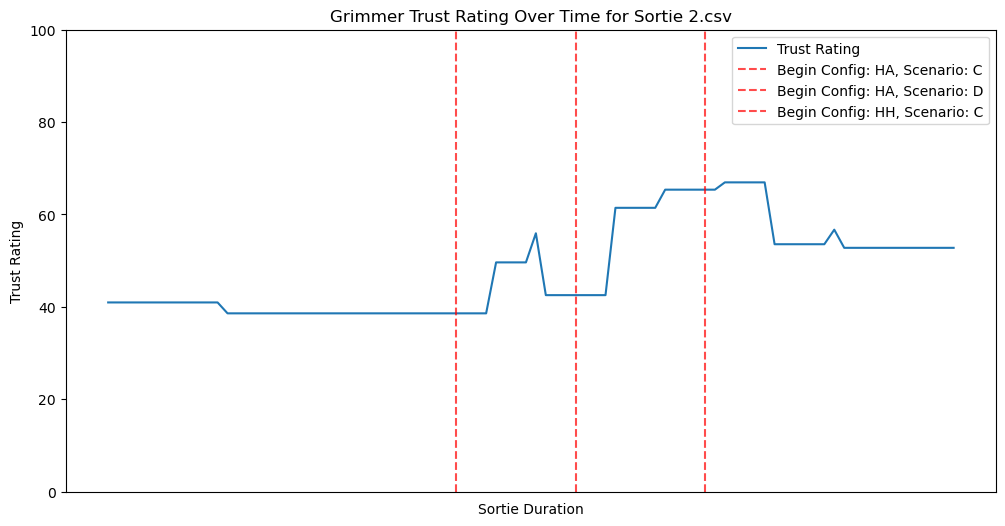

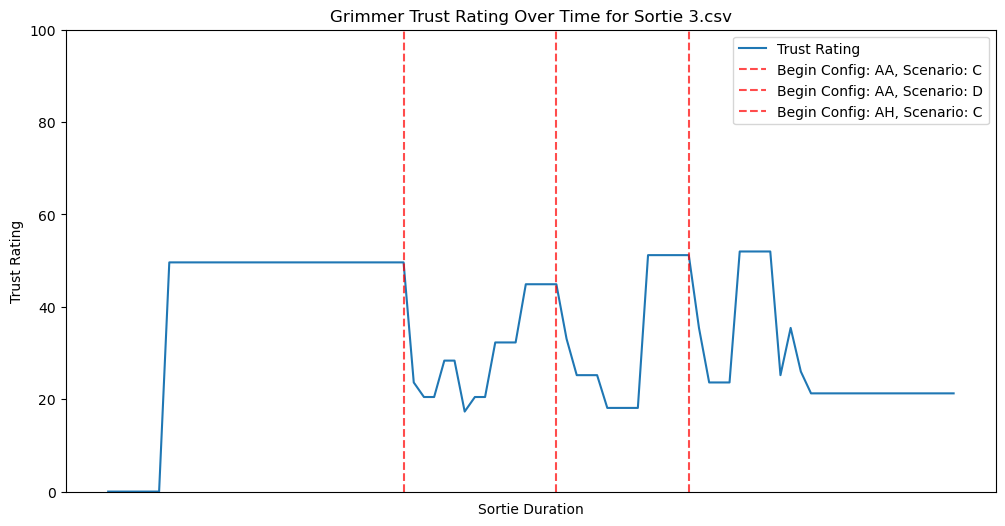

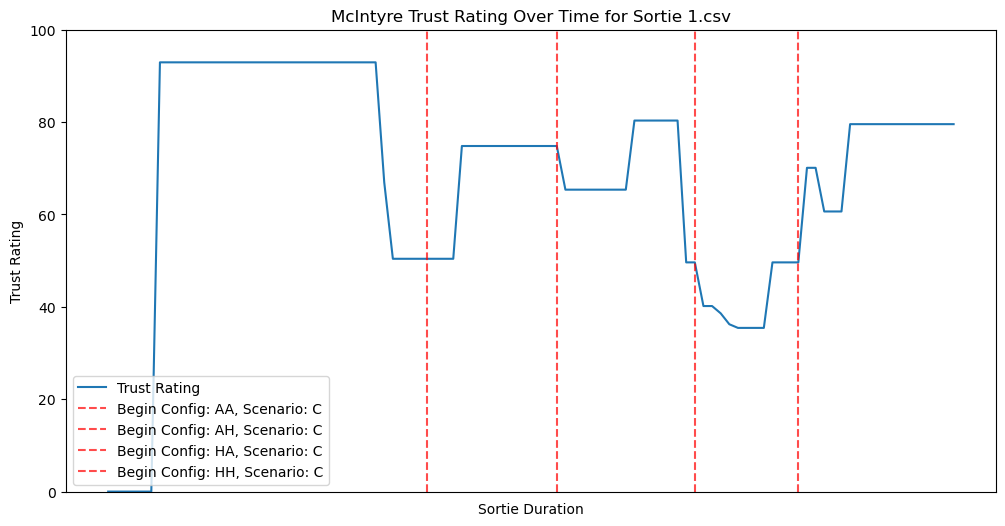

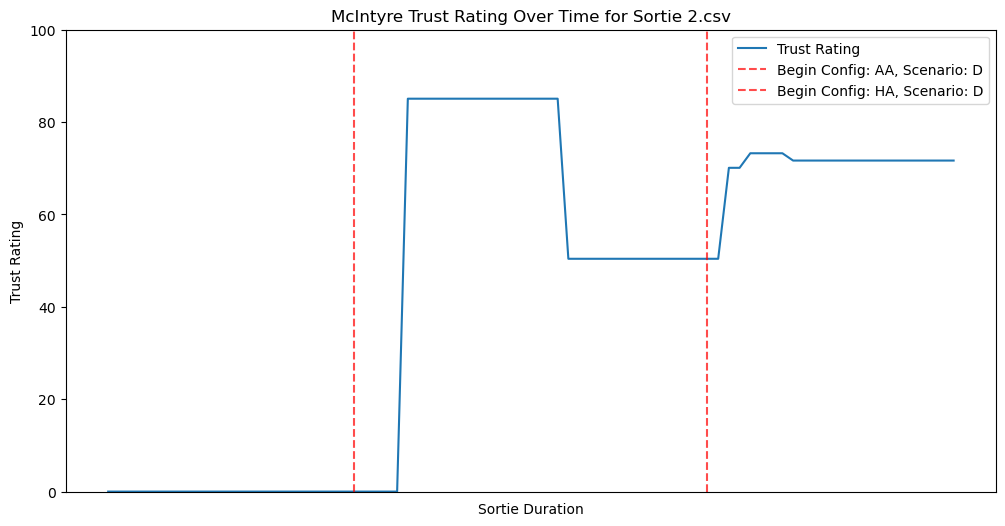

In [75]:
# iterate over every file in the trust_path directory
for filename in os.listdir(trust_path):
    plt.figure(figsize=(12, 6), dpi=100)
    try:
        example_trust = pd.read_csv(os.path.join(trust_path, filename))
    except UnicodeDecodeError:
        print(f"⚠️ Skipping {filename}, bad encoding")
        continue

    pilot_name = filename.split('_')[1]
    flight_number = filename.split('_')[2]
    example_trust = example_trust[::100].copy()
    example_trust['Timestamp'] = pd.to_datetime(example_trust['Timestamp'])

    plt.plot(example_trust['SampleTime'], 
            example_trust['RatingValue'], 
            label='Trust Rating')

    # find first SampleTime for each (Configuration, Scenario)
    scenario_starts = (
        example_trust.groupby(['Configuration', 'Scenario'])['SampleTime']
        .min()
        .reset_index()
    )

    # draw vertical lines with labels
    for idx, row in scenario_starts.iterrows():
        label = f"Begin Config: {row['Configuration']}, Scenario: {row['Scenario']}"
        plt.axvline(x=row['SampleTime'], color='red', linestyle='--', alpha=0.7, label=label)

    plt.ylim(0, 100)
    plt.xlabel('Sortie Duration')
    plt.ylabel('Trust Rating')
    plt.title(f'{pilot_name} Trust Rating Over Time for Sortie {flight_number}')
    plt.legend()
    plt.xticks(ticks=[])
    plt.savefig(f'TrustPlots/TrustPlot_{pilot_name}_{flight_number}.jpg', bbox_inches='tight', dpi=500)
